In [4]:
from qiskit import transpile
from qiskit.circuit.library import RealAmplitudes
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit
sim = AerSimulator()

In [5]:
import random

In [6]:
num_bits = 10
basis_states = ['Z', 'X']

In [7]:
alice_circ = QuantumCircuit(1)
bob_circ = QuantumCircuit(1)

In [8]:
for i in range(num_bits):
    bit = random.randint(0, 1)
    basis = random.choice(basis_states)

    if basis == 'Z':
        if bit == 0: 
            alice_circ.h(0)
        else:
            alice_circ.x(0)
            alice_circ.h(0)
    else: #X Basis
        if bit == 0:
            alice_circ.h(0)
            alice_circ.s(0)
        else: 
            alice_circ.x(0)
            alice_circ.h(0)
            alice_circ.s(0)
alice_circ.measure_all()
bob_circ.measure_all()

#Transpile the circuits for the simulator
alice_circ = transpile(alice_circ, basis_gates=['u1', 'u2', 'u3', 'cx'], optimization_level=0)
bob_circ = transpile(bob_circ, basis_gates=['u1', 'u2', 'u3', 'cx'], optimization_level=0)




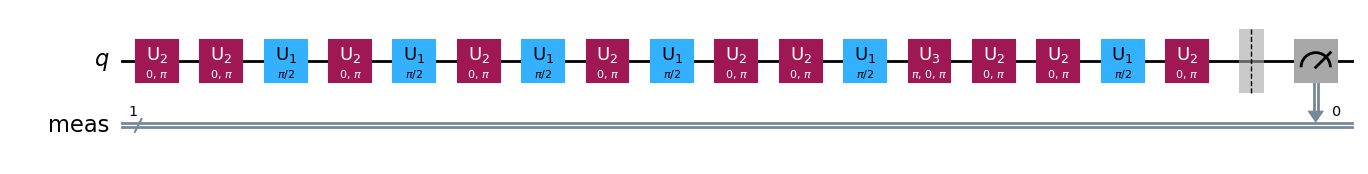

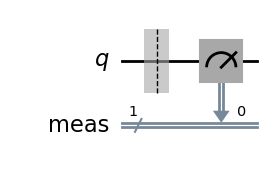

In [9]:
display(alice_circ.draw('mpl'))
display(bob_circ.draw('mpl'))

In [10]:
job = sim.run([alice_circ, bob_circ], shots = 1024)
result = job.result()
alice_bits = result.get_counts(alice_circ)
bob_bits = result.get_counts(bob_circ)


In [11]:
#print the encoded bits
print("Alice's bits: ", alice_bits)
print("Bob's bits: ", bob_bits)

Alice's bits:  {'1': 515, '0': 509}
Bob's bits:  {'0': 1024}
